# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [86]:
# Write your answer here
import glob
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
EBOLA_FOLDER= DATA_FOLDER+'ebola/'
GUINEA_FOLDER= EBOLA_FOLDER+'guinea_data'
LIBERIA_FOLDER= EBOLA_FOLDER+'liberia_data'
SIERRALEONE_FOLDER = EBOLA_FOLDER+'sl_data'

GUINEA_FILES = glob.glob(join(GUINEA_FOLDER, "*.csv"))
LIBERIA_FILES = glob.glob(join(LIBERIA_FOLDER, "*.csv"))
SIERRALEONE_FILES = glob.glob(join(SIERRALEONE_FOLDER, "*.csv"))
GUINEA_DFS = pd.concat([pd.read_csv(f) for f in GUINEA_FILES], ignore_index=True)
LIBERIA_DFS = pd.concat([pd.read_csv(f) for f in LIBERIA_FILES], ignore_index=True)
SIERRALEONE_DFS = pd.concat([pd.read_csv(f) for f in SIERRALEONE_FILES], ignore_index=True)


In [58]:
#GUINEA_DFS.head()
print(GUINEA_DFS.columns)
print(LIBERIA_DFS.columns)
print(SIERRALEONE_DFS.columns)
type(SIERRALEONE_DFS.date)
GUINEA_DFS.set_index('Date')
GUINEA_DFS.Totals

Index(['Beyla', 'Boffa', 'Conakry', 'Coyah', 'Dabola', 'Dalaba', 'Date',
       'Description', 'Dinguiraye', 'Dubreka', 'Forecariah', 'Gueckedou',
       'Kerouane', 'Kindia', 'Kissidougou', 'Kouroussa', 'Lola', 'Macenta',
       'Mzerekore', 'Nzerekore', 'Pita', 'Siguiri', 'Telimele', 'Totals',
       'Yomou'],
      dtype='object')
Index(['Bomi County', 'Bong County', 'Date', 'Gbarpolu County', 'Grand Bassa',
       'Grand Cape Mount', 'Grand Gedeh', 'Grand Kru', 'Lofa County',
       'Margibi County', 'Maryland County', 'Montserrado County', 'National',
       'Nimba County', 'River Gee County', 'RiverCess County', 'Sinoe County',
       'Unnamed: 18', 'Variable'],
      dtype='object')
Index(['34 Military Hospital', 'Bo', 'Bo EMC', 'Bombali', 'Bonthe',
       'Hastings-F/Town', 'Kailahun', 'Kambia', 'Kenema', 'Kenema (IFRC)',
       'Kenema (KGH)', 'Koinadugu', 'Kono', 'Moyamba', 'National',
       'Police training School', 'Police traning School', 'Port Loko',
       'Pujehun', 'T

0          5
1          0
2          4
3          9
4         11
5        133
6        351
7        495
8          2
9          2
10         0
11         0
12         2
13       133
14       228
15       363
16        31
17        18
18         0
19        13
20       138
21        89
22       161
23       190
24        52
25        81
26         7
27         6
28       220
29       277
       ...  
684        6
685       34
686       45
687      177
688      977
689     1199
690      974
691       15
692        0
693      177
694      562
695      739
696      62%
697        2
698       69
699        0
700       35
701       25
702      114
703       29
704     1576
705        0
706    11772
707     2661
708     2595
709     9110
710        1
711       25
712        0
713     2832
Name: Totals, Length: 714, dtype: object

In [59]:
import calendar
from datetime import datetime
dt = datetime.strptime("2014-09-26", "%Y-%m-%d")
print(calendar.month_name[dt.month])

September


# Daily average per month of new cases and deaths

In [80]:
#print(GUINEA_DFS.loc[:'Total cases of confirmed'])
#GUINEA_DFS.reset_index().groupby("Description").mean()
import math

NewCasesGuinea= [int(k) for k in GUINEA_DFS[GUINEA_DFS.Description == 'New cases of confirmed'].Totals]
NewDeathGuinea= [int(k) for k in GUINEA_DFS[(GUINEA_DFS.Description == 'New deaths registered today') | (GUINEA_DFS.Description == 'New deaths registered')].Totals]
DateFieldG = pd.DatetimeIndex(GUINEA_DFS['Date']).normalize().unique().month

GuineaSummary = pd.DataFrame({'Location': 'Guinea', 'New Case': NewCasesGuinea, 'New Death': NewDeathGuinea},index=DateFieldG).fillna(0)
print('Guinea', [GuineaSummary.groupby(['Date'])['New Case'].mean() , GuineaSummary.groupby(['Date'])['New Case'].count() ])
print('Guinea',[GuineaSummary.groupby(['Date'])['New Death'].mean() ,GuineaSummary.groupby(['Date'])['New Death'].count() ])



NewCasesLiberia=[float(k) for k in (LIBERIA_DFS[LIBERIA_DFS.Variable == 'New case/s (confirmed)'].National)]
NewDeathLiberia=[float(k) for k in (LIBERIA_DFS[LIBERIA_DFS.Variable == 'Newly reported deaths'].National) ]
DateFieldL = pd.DatetimeIndex(LIBERIA_DFS['Date']).normalize().unique().month
LiberiaSummary = pd.DataFrame({'Location': 'Liberia', 'New Case': NewCasesLiberia, 'Location': 'Liberia', 'New Death': NewDeathLiberia},index=DateFieldL).fillna(0)
print('#######\n Liberia',[LiberiaSummary.groupby(['Date'])['New Case'].mean() , LiberiaSummary.groupby(['Date'])['New Case'].count() ])
print('Liberia',[LiberiaSummary.groupby(['Date'])['New Death'].mean() ,LiberiaSummary.groupby(['Date'])['New Death'].count() ])



NewCasesSierraLeone = [float(k) for k in (SIERRALEONE_DFS[SIERRALEONE_DFS.variable == 'new_confirmed'].National)]
SIERRALEONE_DFS.ix[SIERRALEONE_DFS.Kenema == '-', 'Kenema'] = 0

modify_DeathSL = SIERRALEONE_DFS[SIERRALEONE_DFS.variable == 'etc_new_deaths'][
    [col for col in SIERRALEONE_DFS.columns.values if col not in ['National', 'date', 'variable']]
].apply(pd.to_numeric).sum(axis=1)
NewDeathSierraLeone = SIERRALEONE_DFS[SIERRALEONE_DFS.variable == 'etc_new_deaths'].National.copy()
NewDeathSierraLeone[NewDeathSierraLeone.isnull()] = modify_DeathSL[NewDeathSierraLeone.isnull()]
DateFieldSL = pd.DatetimeIndex(SIERRALEONE_DFS['date']).normalize().unique().month
SierraLeoneSummary = pd.DataFrame({'New Case': NewCasesSierraLeone,'New Death': NewDeathSierraLeone.values},index=DateFieldSL, dtype=float)


print('#######\n SL,',[SierraLeoneSummary.groupby(['date'])['New Case'].mean() , SierraLeoneSummary.groupby(['date'])['New Case'].count() ])
print('SL',[SierraLeoneSummary.groupby(['date'])['New Death'].mean(),SierraLeoneSummary.groupby(['date'])['New Death'].count() ])






#print("Average number of new cases per day in Guinea: {:.3f}".format(np.average(NewCasesGuinea)))
#print("Average number of new death cases per day in Guinea: {:.3f} \n".format(np.average(NewDeathGuinea)))

#print("Average number of new cases per day in Liberia: {:.3f}".format(np.average(NewCasesLiberia)))
#print("Average number of new death cases per day in Liberia: {:.3f} \n".format(np.average(NewDeathLiberia)))


#print("Average number of new cases per day in Sierra Leone: {:.3f}".format(np.average(NewCasesSierraLeone)))
#print("Average number of new death cases per day in Sierra Leone: {:.3f} \n".format(np.average(NewDeathSierraLeone)))

Guinea [Date
8     12.4
9     13.0
10     6.0
Name: New Case, dtype: float64, Date
8      5
9     16
10     1
Name: New Case, dtype: int64]
Guinea [Date
8      3.4000
9      3.5625
10    15.0000
Name: New Death, dtype: float64, Date
8      5
9     16
10     1
Name: New Death, dtype: int64]
#######
 Liberia [Date
6        2.142857
7        1.818182
8        5.444444
9        6.166667
10       1.360000
11       2.600000
12    1928.333333
Name: New Case, dtype: float64, Date
6      7
7     11
8      9
9     24
10    25
11    15
12     9
Name: New Case, dtype: int64]
Liberia [Date
6      2.000000
7      4.272727
8     23.222222
9     36.041667
10    28.040000
11    13.466667
12     0.000000
Name: New Death, dtype: float64, Date
6      7
7     11
8      9
9     24
10    25
11    15
12     9
Name: New Death, dtype: int64]
booooooooooomba latina       New Case  New Death
date                     
12        11.0        8.0
8         15.0        6.0
8         13.0        7.0
8         10.0     

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [178]:
MICROBIOME_FOLDER= DATA_FOLDER+'microbiome/'
MICROBIOME_FILES = glob.glob(join(MICROBIOME_FOLDER, "MID*.xls"))
metadata = pd.read_excel(MICROBIOME_FOLDER + 'metadata.xls')

MICROBIOME_DFS = pd.concat([pd.read_excel(f,header=None, names = ['Microbe', 'Counts']).assign(BARCODE=metadata.BARCODE[idx],Group=metadata.GROUP[idx],Sample = metadata.SAMPLE[idx]) for idx,f in enumerate(MICROBIOME_FILES)] ,ignore_index=True).fillna('unkown')
print(MICROBIOME_DFS)

                                                Microbe  Counts BARCODE  \
0     Archaea "Crenarchaeota" Thermoprotei Desulfuro...       7    MID1   
1     Archaea "Crenarchaeota" Thermoprotei Desulfuro...       2    MID1   
2     Archaea "Crenarchaeota" Thermoprotei Sulfoloba...       3    MID1   
3     Archaea "Crenarchaeota" Thermoprotei Thermopro...       3    MID1   
4     Archaea "Euryarchaeota" "Methanomicrobia" Meth...       7    MID1   
5     Archaea "Euryarchaeota" "Methanomicrobia" Meth...       1    MID1   
6     Archaea "Euryarchaeota" "Methanomicrobia" Meth...       1    MID1   
7     Archaea "Euryarchaeota" Archaeoglobi Archaeogl...       1    MID1   
8     Archaea "Euryarchaeota" Archaeoglobi Archaeogl...       1    MID1   
9     Archaea "Euryarchaeota" Halobacteria Halobacte...       1    MID1   
10    Archaea "Euryarchaeota" Halobacteria Halobacte...       4    MID1   
11    Archaea "Euryarchaeota" Halobacteria Halobacte...       1    MID1   
12    Archaea "Euryarchae

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [303]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
titanic = pd.read_excel(DATA_FOLDER+'titanic.xls')
titanic.dropna(axis=1)
print(titanic.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [245]:
print(titanic.dtypes)
transformedTitanic= titanic
transformedTitanic['sex'].replace('female', 0,inplace=True)
transformedTitanic['sex'].replace('male',1 ,inplace=True)
for el in transformedTitanic:
    try:
        print(el, transformedTitanic[el].min(),transformedTitanic[el].max())
    except:
        print('hex', el, type(el))

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object
pclass 1 3
survived 0 1
name Abbing, Mr. Anthony van Melkebeke, Mr. Philemon
sex 0 1
hex age <class 'str'>
sibsp 0 8
parch 0 9
hex ticket <class 'str'>
hex fare <class 'str'>
cabin A10 unknown
embarked C unknown
hex boat <class 'str'>
hex body <class 'str'>
home.dest ?Havana, Cuba unknown


29.0


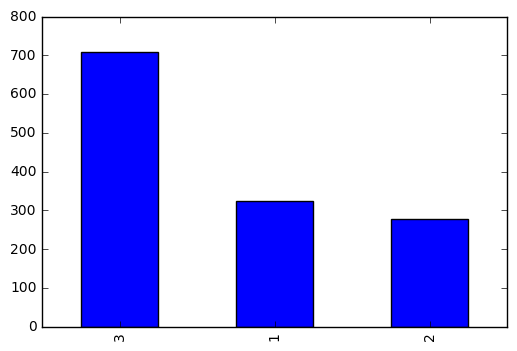

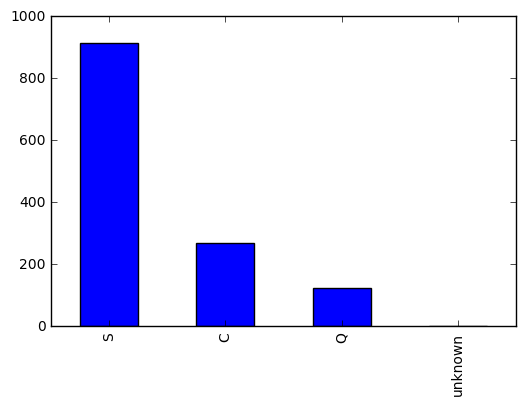

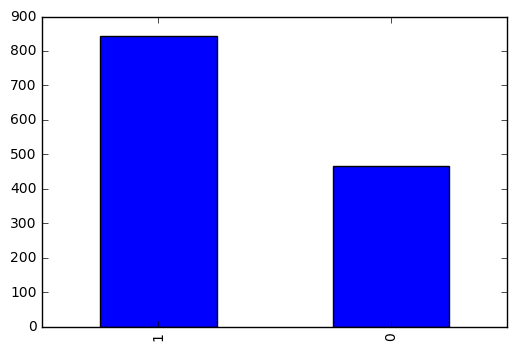

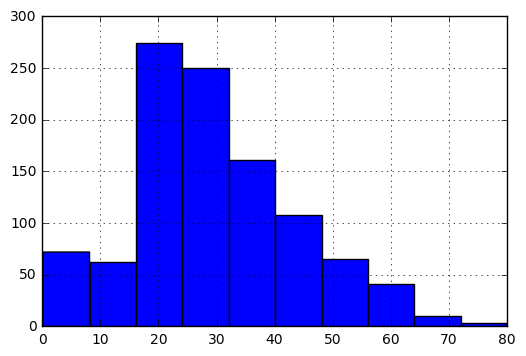

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt


print(transformedTitanic.age[0])
plt.figure();
transformedTitanic['pclass'].value_counts().plot(kind='bar')
#transformedTitanic.hist(column="sex",bins=3)
plt.figure();
transformedTitanic['embarked'].value_counts().plot(kind='bar')

plt.figure();
transformedTitanic['sex'].value_counts().plot(kind='bar')
plt.figure();
titanic_age=titanic.age.dropna(axis=0)
titanic_age.hist(bins=10)

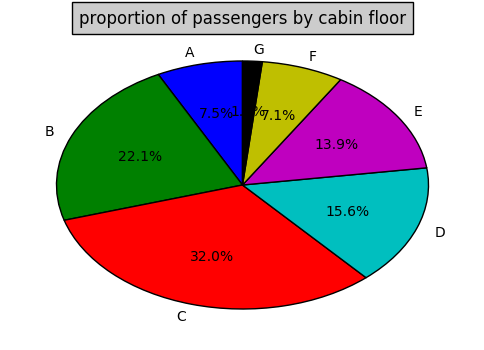

In [344]:
#plt.figure();
#transformedTitanic['cabin'].value_counts().plot(kind='bar')
titanic_cabin=titanic.cabin.dropna(axis=0)
titanic_cabinFloor = [k[0] for k in titanic_cabin]
plt.figure();
titanic_cabinFloor.count('G')
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))

# The slices will be ordered and plotted counter-clockwise.
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
fracs = [titanic_cabinFloor.count(el) for el in labels]

pie(fracs,  labels=labels,autopct='%1.1f%%', startangle=90)
        
title('proportion of passengers by cabin floor', bbox={'facecolor':'0.8', 'pad':5})

show()


kjdfl survived
0    0.618029
1    0.381971
Name: sex, dtype: float64 <class 'pandas.core.series.Series'>


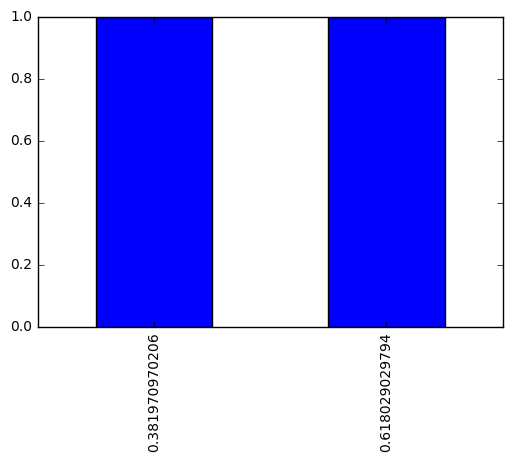

In [375]:

survivedSex= titanic.groupby(['survived'])['sex'].count()/titanic.shape[0]
print("kjdfl", survivedSex.T, type(survivedSex.T))


survivedClass= titanic.groupby(['survived'])['pclass'].count()
plt.figure();
survivedSex.value_counts().plot(kind='bar')


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here